In [11]:
import pandas as pd
import numpy as np

In [12]:
test = pd.read_csv("./archive_mnist/mnist_test.csv")
train = pd.read_csv("./archive_mnist/mnist_train.csv")

test_x = np.array(test.iloc[:, 1:])/255
test_y = np.array(pd.get_dummies(test.iloc[:, 0]))
train_x = np.array(train.iloc[:, 1:])/255
train_y = np.array(pd.get_dummies(train.iloc[:, 0]))
print(np.shape(test_y))

(10000, 10)


In [16]:
class FNN:
    def __init__(self, structure):
        if isinstance(structure, list)!=True:
            raise ValueError("input should be a list of layer sizes")
        self.struct = structure
        self.num_layers = len(structure)-1
        self.w = list()
        self.b = list()
        for i in range(self.num_layers):
            fan_in = structure[i]
            self.w.append((np.random.rand(structure[i], structure[i+1]) - 0.5)* np.sqrt(2.0 / fan_in))
            self.b.append(np.zeros((structure[i+1], 1)))

    def forward_propagation(self, X):
        #the size of X is [p, 1], n = number of neurones in previous layer
        #the size of W is [p, c], m = number of neurones in current layer
        #the size of b is [c, 1]
        z = list()
        a = list()
        a.append(X)
        for i in range(self.num_layers):
            z.append(self.w[i].T@a[i] + self.b[i])
            
            if i == self.num_layers - 1:
                a.append(self.softmax(z[i]))
            else:
                a.append(self.relu(z[i]))

        return z, a
    
    def backward_propagation(self, Z, A, y, learning_rate):
        delta = None
        for i in reversed(range(self.num_layers)):
            if i == self.num_layers - 1:
                delta = A[i+1] - y
            else:
                delta = (self.w[i+1]@delta)*self.relu_deri(Z[i])
            
            del_w = A[i]@delta.T
            del_b = delta
            del_w = np.clip(del_w, -0.5, 0.5)
            del_b = np.clip(del_b, -0.5, 0.5)
            self.w[i] -= learning_rate*del_w
            self.b[i] -= learning_rate*del_b
            
    
    def predict(self, X):
        _, A = self.forward_propagation(X)
        return np.argmax(A[-1])
    
    def train(self, X, Y, learning_rate = 0.1):
        Z, A = self.forward_propagation(X)
        y = Y
        self.backward_propagation(Z, A, y, learning_rate)
    
    def relu(self, z):
        return np.maximum(0, z)
    
    def relu_deri(self, z):
        return np.where(0 < z, 1, 0)
    
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
        return exp_z / np.sum(exp_z, axis=0, keepdims=True)
    
    def __str__(self):
        return str(self.w)

Training and tracking accuracy...
Step 0: Accuracy = 0.1300
Step 50: Accuracy = 0.1800
Step 100: Accuracy = 0.2100
Step 150: Accuracy = 0.3000
Step 200: Accuracy = 0.3150
Step 250: Accuracy = 0.3200
Step 300: Accuracy = 0.3550
Step 350: Accuracy = 0.3400
Step 400: Accuracy = 0.3700
Step 450: Accuracy = 0.3750
Step 500: Accuracy = 0.3750
Step 550: Accuracy = 0.3550
Step 600: Accuracy = 0.3800
Step 650: Accuracy = 0.4250
Step 700: Accuracy = 0.4750
Step 750: Accuracy = 0.4950
Step 800: Accuracy = 0.4750
Step 850: Accuracy = 0.4950
Step 900: Accuracy = 0.5500
Step 950: Accuracy = 0.5250
Step 1000: Accuracy = 0.5200
Step 1050: Accuracy = 0.5350
Step 1100: Accuracy = 0.5350
Step 1150: Accuracy = 0.5600
Step 1200: Accuracy = 0.5500
Step 1250: Accuracy = 0.5900
Step 1300: Accuracy = 0.6000
Step 1350: Accuracy = 0.5750
Step 1400: Accuracy = 0.5650
Step 1450: Accuracy = 0.5850
Step 1500: Accuracy = 0.5700
Step 1550: Accuracy = 0.5800
Step 1600: Accuracy = 0.5850
Step 1650: Accuracy = 0.5850
Ste

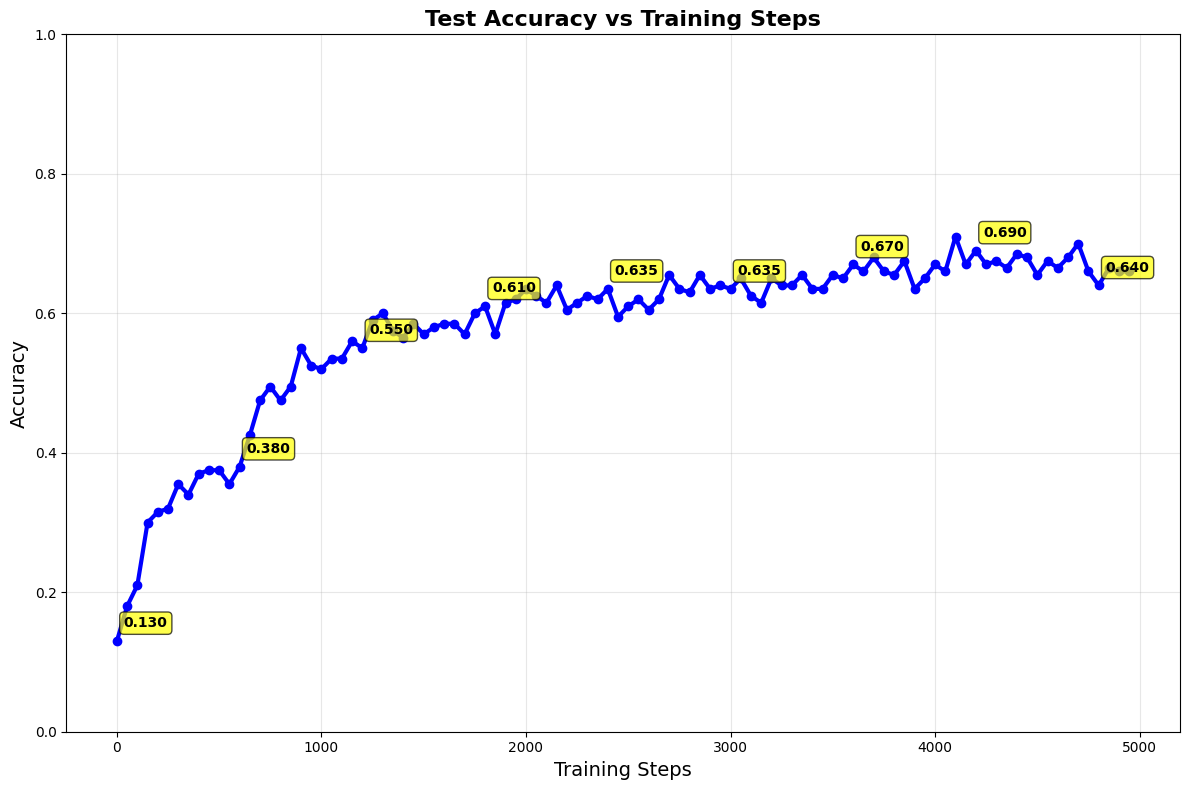


ACCURACY TRACKING SUMMARY
Initial accuracy: 0.1300
Final accuracy: 0.6600
Best accuracy: 0.7100
Total improvement: 0.5300
Training samples processed: 4950


In [41]:
import matplotlib.pyplot as plt

def track_accuracy_only(network, train_x, train_y, test_x, test_y, 
                       num_samples=1000, interval=50, test_size=200):
    """
    Train the network and track only accuracy at regular intervals
    """
    accuracies = []
    training_steps = []
    
    print("Training and tracking accuracy...")
    
    for i in range(num_samples):
        # Get single sample and reshape to column vector (matching your format)
        x_single = train_x[i:i+1].T  # Shape: (784, 1)
        y_single = train_y[i:i+1].T  # Shape: (10, 1) - one-hot encoded
        
        # Train (using your exact training method)
        network.train(x_single, y_single, learning_rate=0.005)
        
        # Test accuracy at intervals
        if i % interval == 0:
            correct = 0
            
            for j in range(test_size):
                # Test prediction (matching your format)
                test_sample = test_x[j:j+1].T  # Shape: (784, 1)
                prediction = network.predict(test_sample)
                actual = np.argmax(test_y[j])
                
                if prediction == actual:
                    correct += 1
            
            accuracy = correct / test_size
            accuracies.append(accuracy)
            training_steps.append(i)
            
            print(f"Step {i}: Accuracy = {accuracy:.4f}")
    
    return training_steps, accuracies

# Create and train your network with accuracy tracking
network1 = FNN([784, 10, 10])

# Track training accuracy
steps, accuracies = track_accuracy_only(
    network1, train_x, train_y, test_x, test_y,
    num_samples=5000, interval=50, test_size=200
)

# Create accuracy chart
plt.figure(figsize=(12, 8))
plt.plot(steps, accuracies, 'b-', linewidth=3, marker='o', markersize=6)
plt.title('Test Accuracy vs Training Steps', fontsize=16, fontweight='bold')
plt.xlabel('Training Steps', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)

# Add accuracy values as annotations
for i in range(0, len(steps), max(1, len(steps)//8)):
    plt.annotate(f'{accuracies[i]:.3f}', 
                xy=(steps[i], accuracies[i]), 
                xytext=(5, 10), textcoords='offset points',
                fontsize=10, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()

# Print accuracy summary
print(f"\n{'='*40}")
print(f"ACCURACY TRACKING SUMMARY")
print(f"{'='*40}")
print(f"Initial accuracy: {accuracies[0]:.4f}")
print(f"Final accuracy: {accuracies[-1]:.4f}")
print(f"Best accuracy: {max(accuracies):.4f}")
print(f"Total improvement: {accuracies[-1] - accuracies[0]:.4f}")
print(f"Training samples processed: {steps[-1]}")